# MNIST Handwritten Digit Classifier - Classify the Number

Given a dataset of 6,000 images of handwritten digits, train a neural network to identify the number.

In [1]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training, validation and test sets.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=1/3)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(49000, 28, 28)
(49000,)
(14000, 28, 28)
(14000,)
(7000, 28, 28)
(7000,)


Show one example digit.

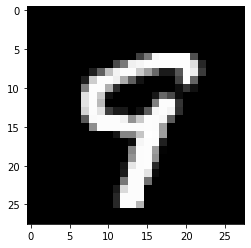

In [5]:
plt.imshow(X_train[1], cmap='gray')

In [6]:
y_train[1]

9

Prepare features and target for training.

In [7]:
image_height, image_width = 28, 28

X_train = X_train.reshape(49000, image_height*image_width)
X_val = X_val.reshape(14000, image_height*image_width)
X_test = X_test.reshape(7000, image_height*image_width)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(49000, 784)
(14000, 784)
(7000, 784)


In [8]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(49000, 10)
(14000, 10)
(7000, 10)


Train a neural network with 2 hidden layers of 64 nodes each.

In [9]:
model = Sequential()

In [10]:
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2997 - accuracy: 0.9123 - val_loss: 0.1678 - val_accuracy: 0.9507
Epoch 2/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1342 - accuracy: 0.9595 - val_loss: 0.1315 - val_accuracy: 0.9601
Epoch 3/20
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0993 - accuracy: 0.9690 - val_loss: 0.1079 - val_accuracy: 0.9681
Epoch 4/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.1108 - val_accuracy: 0.9671
Epoch 5/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.1054 - val_accuracy: 0.9699
Epoch 6/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.0538 - accuracy: 0.9824 - val_loss: 0.0985 - val_accuracy: 0.9710
Epoch 7/20
1532/1532 [==============================] - 10s 6ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.1172 - val_accuracy

Evaluate the model performance.

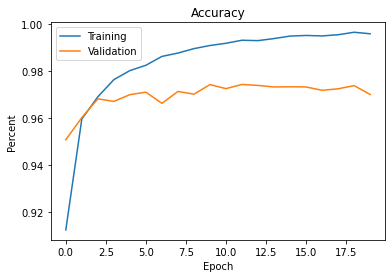

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'])

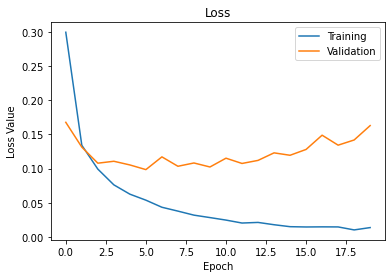

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Validation'])

In [16]:
score = model.evaluate(X_test, y_test)
score

219/219 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9743


[0.15024442970752716, 0.9742857217788696]

In [19]:
np.argmax(y_test, axis=1)

array([2, 5, 8, ..., 2, 9, 1], dtype=int64)

In [20]:
y_pred_test

array([[4.05110564e-24, 1.92791566e-25, 1.00000000e+00, ...,
        2.28027601e-12, 1.56234930e-21, 2.31776732e-27],
       [5.80445171e-11, 1.57701643e-10, 1.95596820e-11, ...,
        1.70596832e-04, 9.04324509e-07, 1.70896053e-02],
       [1.23438238e-15, 3.64549047e-15, 4.46204922e-07, ...,
        2.09889467e-11, 9.99999523e-01, 1.25166294e-12],
       ...,
       [4.14927126e-13, 4.71925508e-15, 1.00000000e+00, ...,
        6.48893717e-10, 5.85504171e-12, 2.92923411e-12],
       [4.56587139e-15, 1.15422026e-10, 8.30999619e-16, ...,
        1.68579276e-10, 2.21422702e-09, 9.99997497e-01],
       [3.74365079e-20, 9.99999285e-01, 2.49330103e-08, ...,
        3.19708100e-08, 5.60114245e-07, 2.54182257e-08]], dtype=float32)

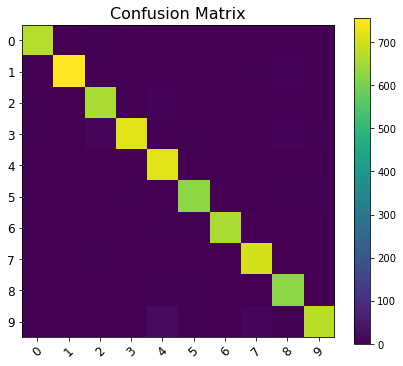

Test accuracy: 0.9742857142857143


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(np.argmax(y_test, axis=1), y_pred_test_classes))
plt.xticks(np.arange(10), np.arange(10), rotation=45, fontsize=12)
plt.yticks(np.arange(10), np.arange(10), fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(np.argmax(y_test, axis=1), y_pred_test_classes))